# Amazon EDA

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv('amazon_delivery.csv')

#### Assess Data  - overview, type, size

In [9]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [10]:
df.shape

(43739, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


#### Clean Data  - find and fix , missing, duplicated and outliers

In [13]:
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

#### null values - mean/median

In [17]:
df['Agent_Rating'].fillna(df['Agent_Rating'].median(), inplace = True)
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)
df.isnull().sum()  

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

#### Find duplicates 

In [21]:
df.duplicated().sum()

0

### Outlier detection for Agent Rating and Delivery Time

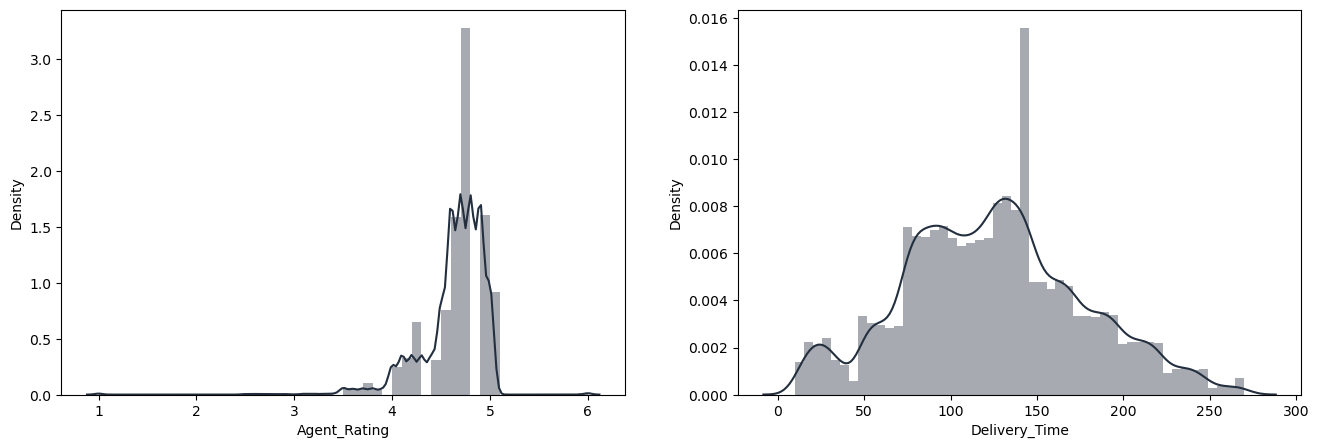

In [23]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Agent_Rating'], color = '#232f3e')
plt.subplot(1,2,2)
sns.distplot(df['Delivery_Time'], color = '#232f3e')
plt.show()

### Categorical Data Analysis: Investigate unique values in Weather, Traffic, Vehicle, Area, and Category.

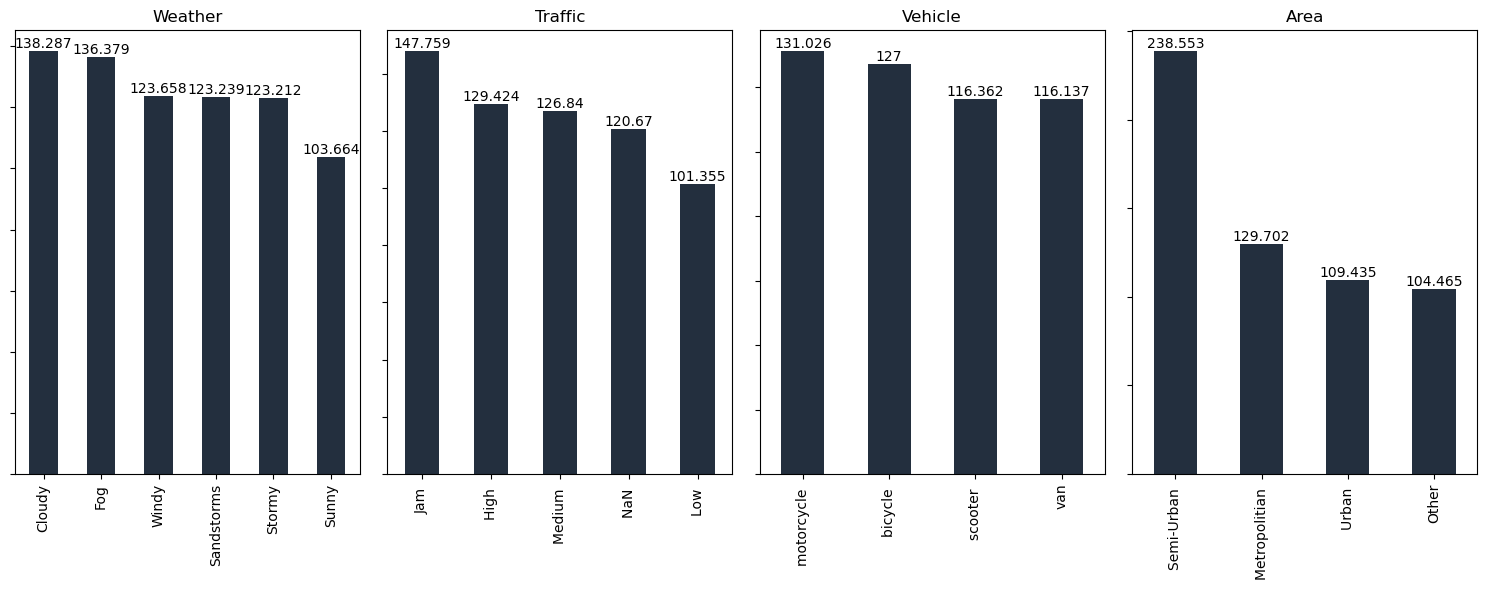

In [79]:
categorical_features = ['Weather', 'Traffic', 'Vehicle', 'Area', 'Category']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6) )

for i, j in enumerate(categorical_features[:-1]):
    grouped = df.groupby(j)
    count = grouped["Delivery_Time"].mean()
    count = pd.DataFrame(count).sort_values("Delivery_Time", ascending=False)
    count["Delivery_Time"].plot(kind="bar", ax=axes[i] ,color='#232f3e')
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_yticklabels(())
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    axes[i].set_title(j)
plt.tight_layout()
plt.show()





### Time-Based Analysis: Convert Order_Date, Order_Time, and Pickup_Time into datetime format for time-series analysis.

### Extracting %Y%M%D and weekday from Order Date

In [32]:
df ['Order_Date'] = pd.to_datetime(df['Order_Date'])
df ['Year'] = df['Order_Date'].dt.year
df ['Month'] = df['Order_Date'].dt.month
df ['Day'] = df['Order_Date'].dt.day
df ['Weekday'] = df['Order_Date'].dt.weekday


### Extracting order_hour and pickup_hour from Order_Time and Pickup_Time

In [34]:
df['Order_Time'] = pd.to_datetime(df['Order_Time'],format = '%H:%M:%S', errors ='coerce')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'],format = '%H:%M:%S', errors ='coerce')
df['Order_Hour'] = df['Order_Time'].dt.hour
df['Pickup_Hour'] = df['Pickup_Time'].dt.hour


### Drop old columns

In [36]:
df.drop(['Order_Date', 'Order_Time', 'Pickup_Time'], axis=1, inplace=True)
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Year,Month,Day,Weekday,Order_Hour,Pickup_Hour
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,motorcycle,Urban,120,Clothing,2022,3,19,5,11.0,11
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,scooter,Metropolitian,165,Electronics,2022,3,25,4,19.0,19
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,motorcycle,Urban,130,Sports,2022,3,19,5,8.0,8
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,2022,4,5,1,18.0,18
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,scooter,Metropolitian,150,Toys,2022,3,26,5,13.0,13


### Plot Datetime Analysis

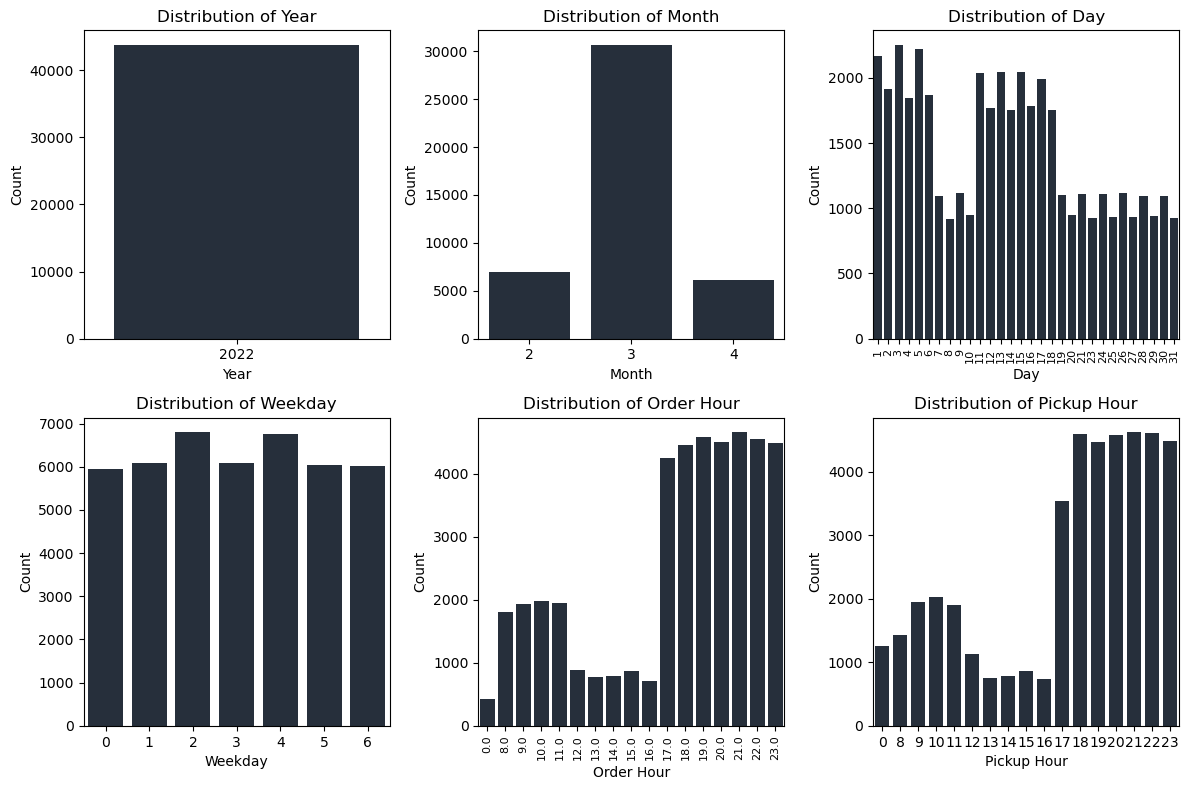

In [39]:
color = '#232f3e'

plt.figure(figsize=(12, 8))

# Distribution of 'year'
plt.subplot(2, 3, 1)
sns.countplot(x='Year', data=df, color=color)
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Distribution of 'month'
plt.subplot(2, 3, 2)
sns.countplot(x='Month', data=df, color=color)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Distribution of 'day'
plt.subplot(2, 3, 3)
sns.countplot(x='Day', data=df, color=color)
plt.title('Distribution of Day')
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('Day')
plt.ylabel('Count')

# Distribution of 'weekday'
plt.subplot(2, 3, 4)
sns.countplot(x='Weekday', data=df, color=color)
plt.title('Distribution of Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')

# Distribution of 'order_hour'
plt.subplot(2, 3, 5)
sns.countplot(x='Order_Hour', data=df, color=color)
plt.title('Distribution of Order Hour')
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('Order Hour')
plt.ylabel('Count')

# Distribution of 'pickup_hour'
plt.subplot(2, 3, 6)
sns.countplot(x='Pickup_Hour', data=df, color=color)
plt.title('Distribution of Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Correlation Analysis

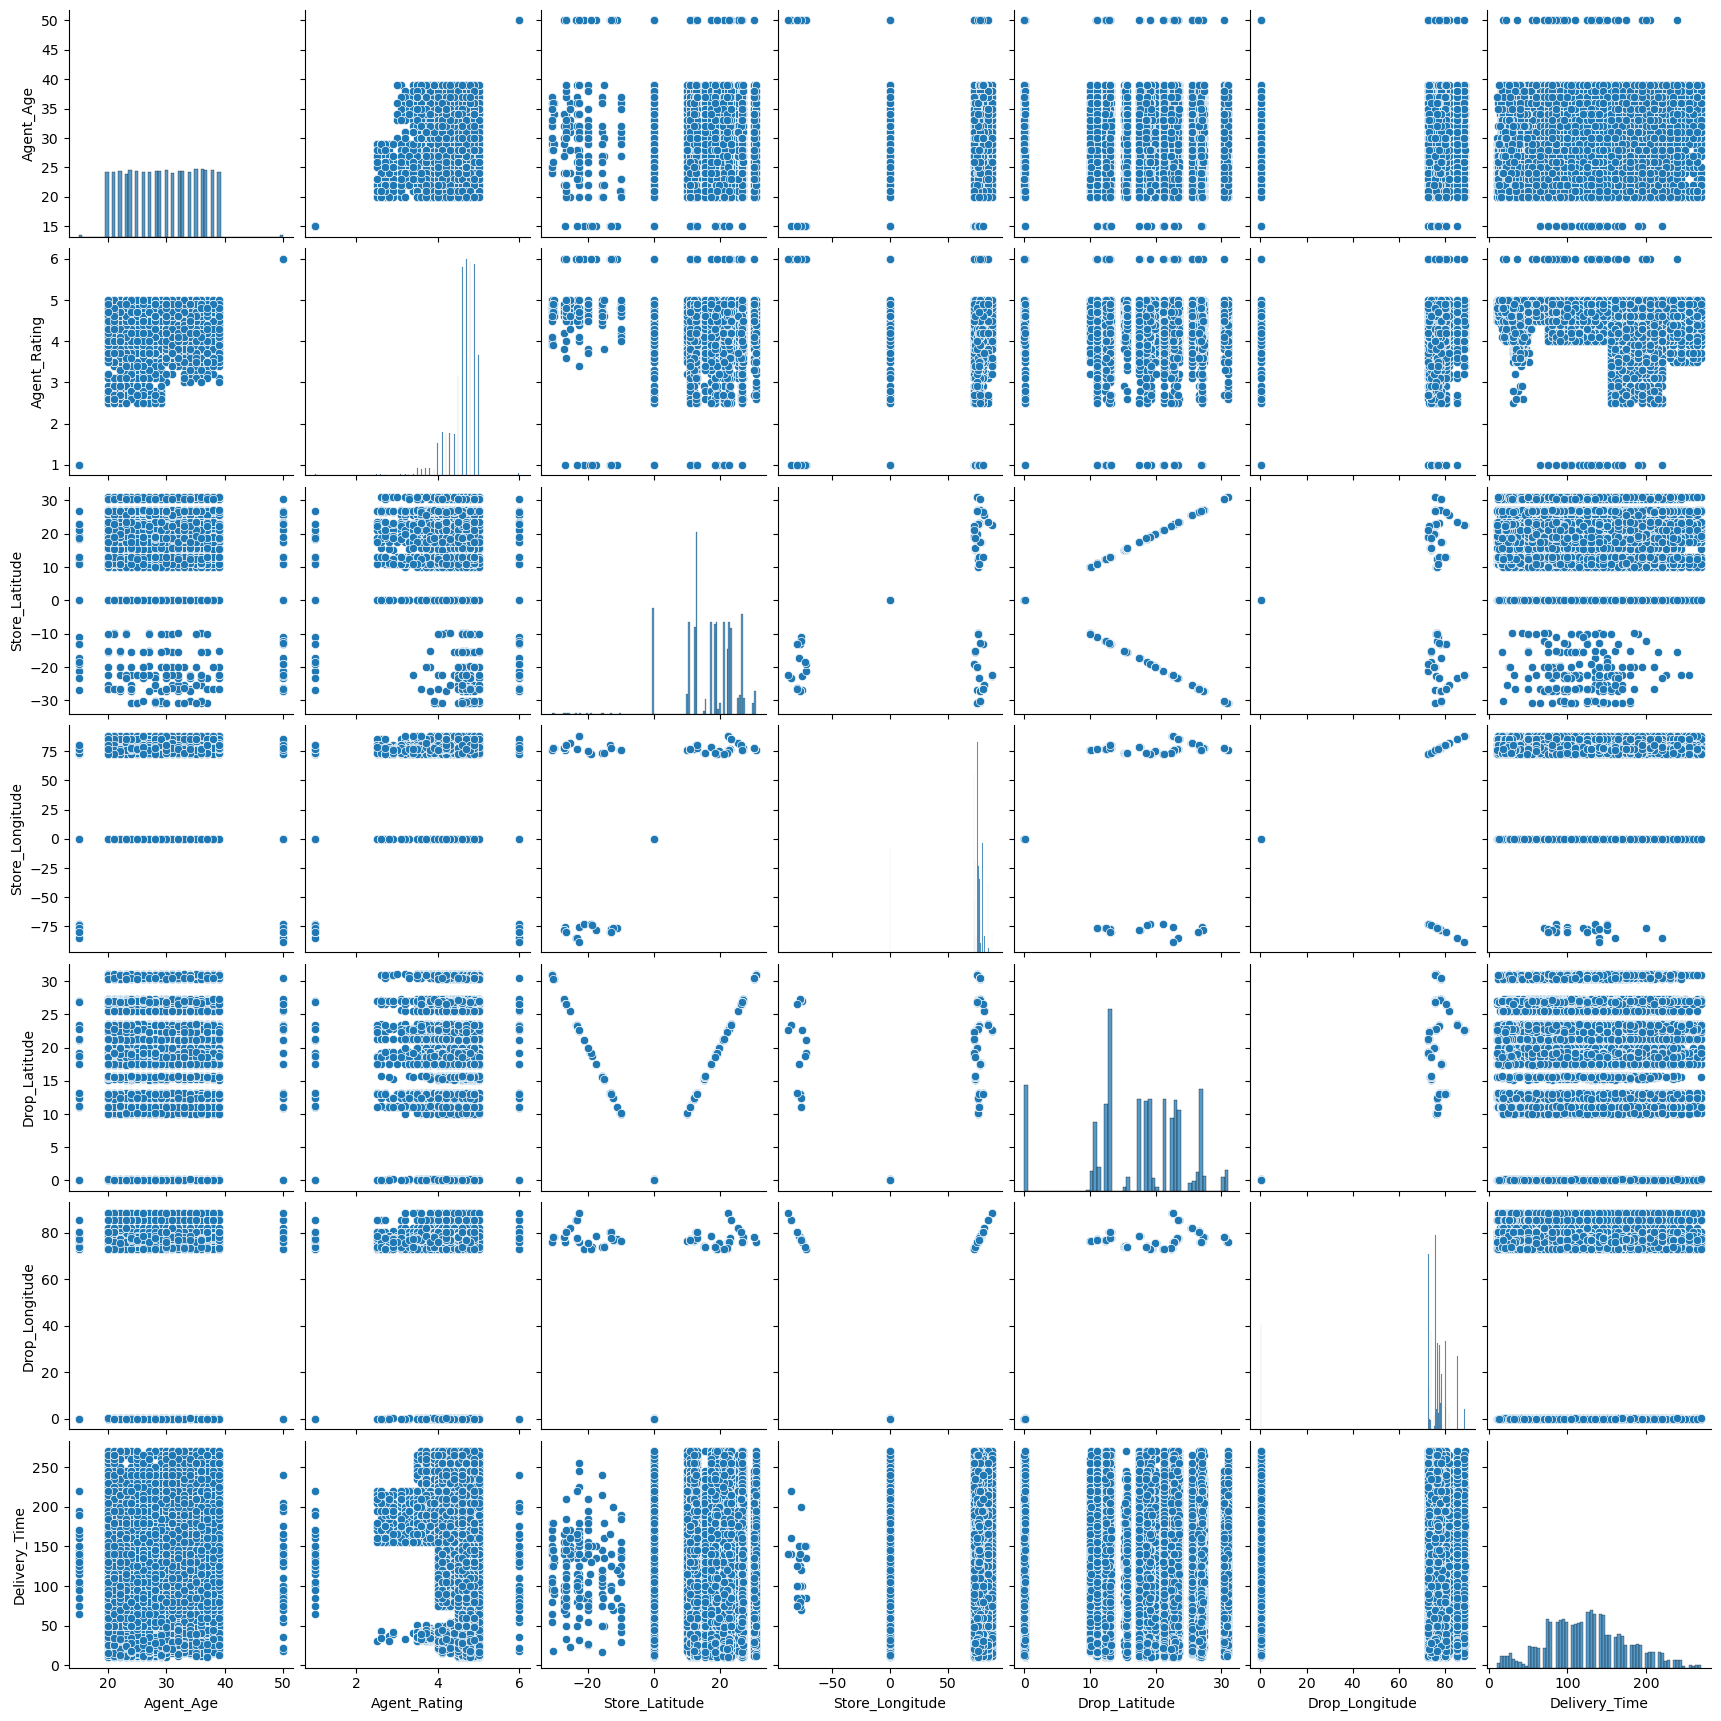

In [84]:
numerical_features = ['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Delivery_Time']

sns.pairplot(df[numerical_features])
plt.show()


### Heatmap

<Axes: >

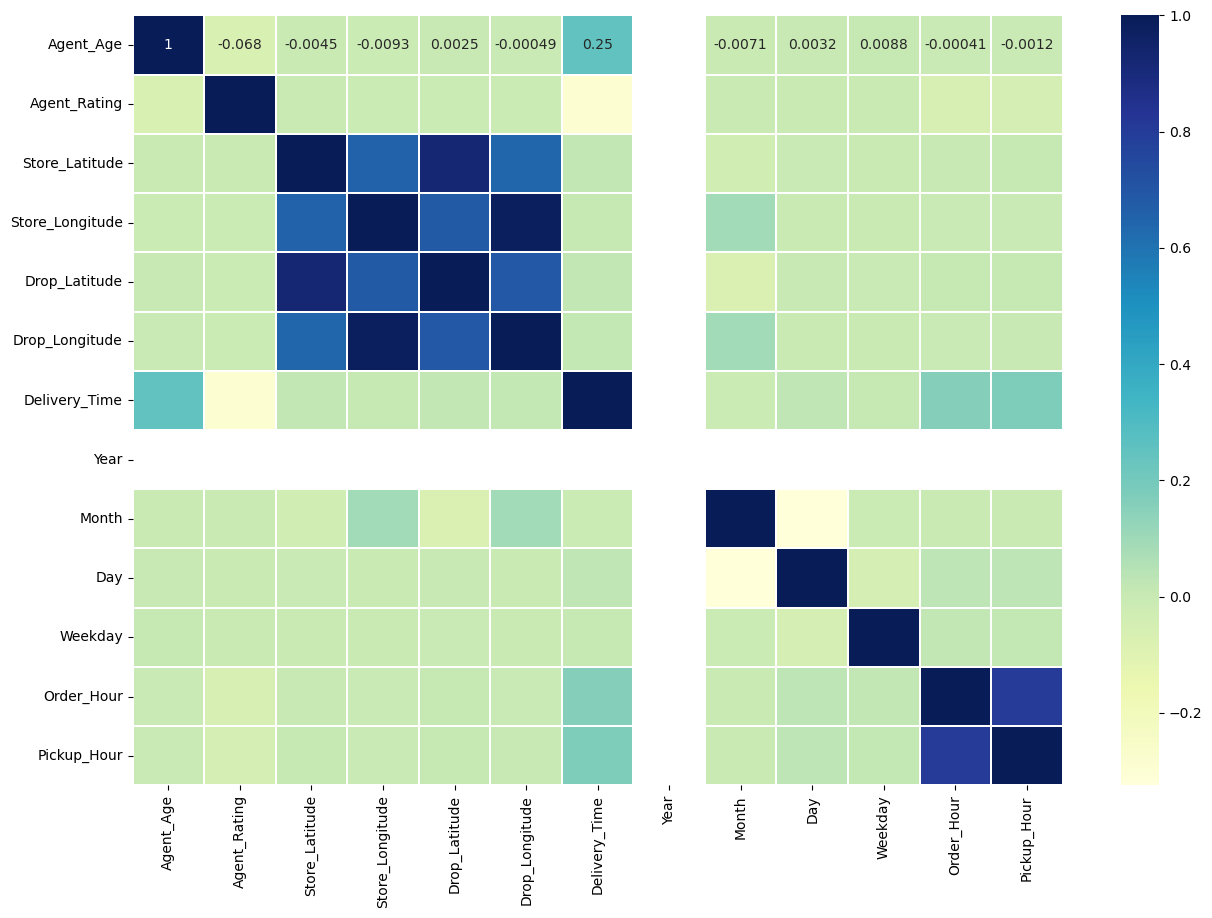

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(np.number).corr(),cmap="YlGnBu",annot=True,linewidths=0.05)

### Check Vehicle affects on delivery Time 

### Calculate the distance between Store_Location and Drop_Location

In [57]:
from geopy.distance import geodesic

In [58]:
from geopy.distance import geodesic

def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).km

df['Distance_km'] = df.apply(lambda row: calculate_distance(row['Store_Latitude'], row['Store_Longitude'], 
                                                            row['Drop_Latitude'], row['Drop_Longitude']), axis=1) 

df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Year,Month,Day,Weekday,Order_Hour,Pickup_Hour,Distance_km
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,motorcycle,Urban,120,Clothing,2022,3,19,5,11.0,11,3.020737
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,scooter,Metropolitian,165,Electronics,2022,3,25,4,19.0,19,20.143737
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,motorcycle,Urban,130,Sports,2022,3,19,5,8.0,8,1.549693
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,2022,4,5,1,18.0,18,7.774497
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,scooter,Metropolitian,150,Toys,2022,3,26,5,13.0,13,6.197898


In [59]:
df['Distance_km'].mean()

38.46464366726172

### Plot Co-ords onto map

In [106]:
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import folium

In [109]:
# Ctreate base level map
map_center = [df['Store_Latitude'].mean(), df['Store_Longitude'].mean()]
map = folium.Map(location=map_center, zoom_start=5)

In [112]:
# Add Store Locations
for index, row in df.iterrows():
    folium.Marker([row['Store_Latitude'], row['Store_Longitude']], 
                  popup=f"Store Location {index+1}",
                  icon=folium.Icon(color='blue')).add_to(map)

In [116]:
# Add drop locations
for index, row in df.iterrows():
    folium.Marker([row['Drop_Latitude'], row['Drop_Longitude']], 
                  popup=f"Drop Location {index+1}",
                  icon=folium.Icon(color='green')).add_to(map)

In [121]:
from folium.plugins import HeatMap

#Add  Sore Locations for heatmap
store_locs = df[['Store_Latitude', 'Store_Longitude']].values.tolist()

In [123]:
com_locs = df[['Store_Latitude', 'Store_Longitude']].values.tolist() + df[['Drop_Latitude', 'Drop_Longitude']].values.tolist()

In [126]:
#plot map
m2_heat = folium.Map(location=map_center, zoom_start=5)

# Add heatmap
HeatMap(com_locs).add_to(m2_heat)  

# Save the heatmap as an HTML file
m2_heat.save('heatmap.html')
m2_heat

### Add groupby function to measure Delivery Time

In [171]:
df_gp2 = df[['Vehicle','Area','Delivery_Time']]
grouped_test1 = df_gp2.groupby(['Vehicle','Area'],as_index=False).mean()
print(grouped_test1)

        Vehicle            Area  Delivery_Time
0      bicycle   Metropolitian      127.000000
1   motorcycle   Metropolitian      135.274019
2   motorcycle            Other     109.356436
3   motorcycle      Semi-Urban      238.535714
4   motorcycle           Urban      115.502490
5      scooter   Metropolitian      121.800206
6      scooter            Other      98.022573
7      scooter      Semi-Urban      236.666667
8      scooter           Urban      101.801483
9           van  Metropolitian      120.837623
10          van           Other     103.224719
11          van     Semi-Urban      245.000000
12          van          Urban      101.991505


<Axes: xlabel='Delivery_Time', ylabel='Area'>

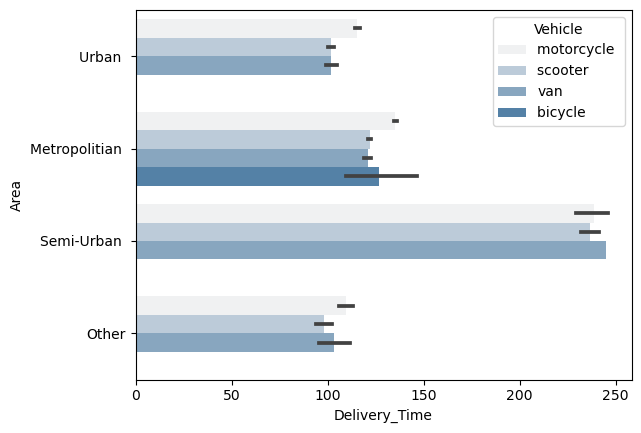

In [168]:
sns.barplot(data =df_gp2, x='Delivery_Time', y = 'Area', hue='Vehicle', color = 'steelblue' )